# SPRINT 2

#### PNT2022TMID27693

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers 
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D 
from keras.optimizers import Adam 
from keras. utils import np_utils
import matplotlib.pyplot as plt   

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  
y_train = np_utils.to_categorical (y_train, number_of_classes) 
y_test = np_utils.to_categorical (y_test, number_of_classes)

## Add CNN Layer

In [3]:
model=Sequential ()

In [4]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
model.add(Flatten())

In [6]:
model.add(Dense(number_of_classes,activation = 'softmax'))

## Compiling The Model

In [7]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

## Train The Model

In [9]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 404s 213ms/step - loss: 0.2249 - accuracy: 0.9514 - val_loss: 0.0874 - val_accuracy: 0.9750
Epoch 2/5
1875/1875 [==============================] - 399s 213ms/step - loss: 0.0678 - accuracy: 0.9793 - val_loss: 0.0755 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 383s 204ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.1004 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 398s 212ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.1025 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 403s 215ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.1780 - val_accuracy: 0.9605


## Observing The Metrices

In [10]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.17797836661338806, 0.9605000019073486]


In [11]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 1s 843ms/step
[[1.2645445e-17 7.7398939e-17 1.9028704e-13 1.3597123e-06 6.8469548e-05
  5.6204458e-10 2.8931941e-15 4.1166891e-07 5.2552567e-09 9.9992979e-01]]


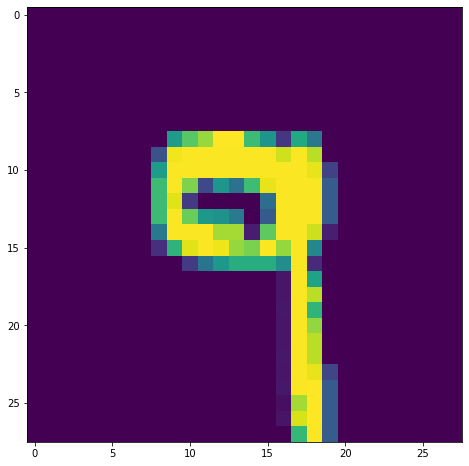

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(x_test[6000])

In [13]:
print(np.argmax(prediction, axis=1))

[9]


## Save The Model

In [14]:
model.save('models/mnistCNN.h5')